## Zara Khatibi - 610398119 - Deep Learning HomeWork

# Predicting Titanic Survival with Logistic Regression

In [164]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import display, Markdown
import matplotlib as mpl
from pandas.plotting import scatter_matrix

In [165]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Train Data

In [166]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Exploring

In [167]:
def data_explore(df_in):
    df = df_in.copy()
    display(Markdown("## **What does the dataframe look like? First few lines of dataframe:**"))
    display(df.head(), "\n") # what does the dataframe look like?
    display(Markdown('---'))

    display(Markdown("**Size of the Dataset:**"))
    print(df.shape, "\n") # what's size of the dataset? (how many instances we have)
    display(Markdown('---'))

    display(Markdown("**Dataframe Columns:**"))
    print(df.columns, "\n") # what are the columns (features) 
    display(Markdown('---'))

    display(Markdown("**Type of Each Column:**"))
    display(df.info(), "\n" )
    display(Markdown('---'))

    display(Markdown("## **Summary of Features :**"))
    display(Markdown("**Numerical Columns/Features :**"))
    display(df.describe(),"\n") # summary of each feature
    display(Markdown("**Categorical Columns/Feature:**"))
    numeric_cols = df.describe().columns
    catergircal_cols = [col for col in df.columns if col not in numeric_cols]
    semi_categorical_cols = [col for col in numeric_cols if df[col].nunique()<10]
    for col in semi_categorical_cols:
        df[col] = df[col].astype(str)
    display(df[semi_categorical_cols].describe())
    display(Markdown("**Semi-Categorical Columns/Feature:**"))
    display(df[semi_categorical_cols].describe())
    display(Markdown('---'))

    display(Markdown("## **Unique Values of Each Categorical Column and Their Counts:**"))
    display(Markdown("**Unique Values of Embarked:**"))
    display(df["Embarked"].value_counts(),"\n")
    display(Markdown("**Unique Values of Sex:**"))
    display(df["Sex"].value_counts(),"\n")
    display(Markdown('---'))

    display(Markdown("**Number of Null Values in Dataframe:**"))
    print("Number of Null Values in Dataframe: " )
    display(df.isna().sum())


In [168]:
data_explore(train)

## **What does the dataframe look like? First few lines of dataframe:**

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


'\n'

---

**Size of the Dataset:**

(891, 12) 



---

**Dataframe Columns:**

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 



---

**Type of Each Column:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

'\n'

---

## **Summary of Features :**

**Numerical Columns/Features :**

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


'\n'

**Categorical Columns/Feature:**

,Survived,Pclass,SibSp,Parch
count,891,891,891,891
unique,2,3,7,7
top,0,3,0,0
freq,549,491,608,678


**Semi-Categorical Columns/Feature:**

,Survived,Pclass,SibSp,Parch
count,891,891,891,891
unique,2,3,7,7
top,0,3,0,0
freq,549,491,608,678


---

## **Unique Values of Each Categorical Column and Their Counts:**

**Unique Values of Embarked:**

S    644
C    168
Q     77
Name: Embarked, dtype: int64

'\n'

**Unique Values of Sex:**

male      577
female    314
Name: Sex, dtype: int64

'\n'

---

**Number of Null Values in Dataframe:**

Number of Null Values in Dataframe: 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# The change_categorical_int function takes a DataFrame as input (df_in) and performs the following steps:

#### 1. Creates a copy of the input DataFrame.
#### 2. Identifies numeric columns using describe() and stores them in numeric_cols.
#### 3. Finds semi-categorical columns (numeric columns with less than 10 unique values) and stores them in semi_categorical_cols.
#### 4. Converts the values in semi-categorical columns to strings.
#### 5. Returns the modified DataFrame.

In [169]:
def change_categorical_int(df_in):
    df = df_in.copy()
    numeric_cols = df.describe().columns
    semi_categorical_cols = [col for col in numeric_cols if df[col].nunique()<10]
    for col in semi_categorical_cols:
        df[col] = df[col].astype(str)
    return df
train2 = change_categorical_int(train)

### Since we have many unique values in Name,Ticket and Cabin we delete them. Also PassengerId is just an index so we can drop it.

In [170]:
train3 = train2.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
train3

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


# Ploting Data:

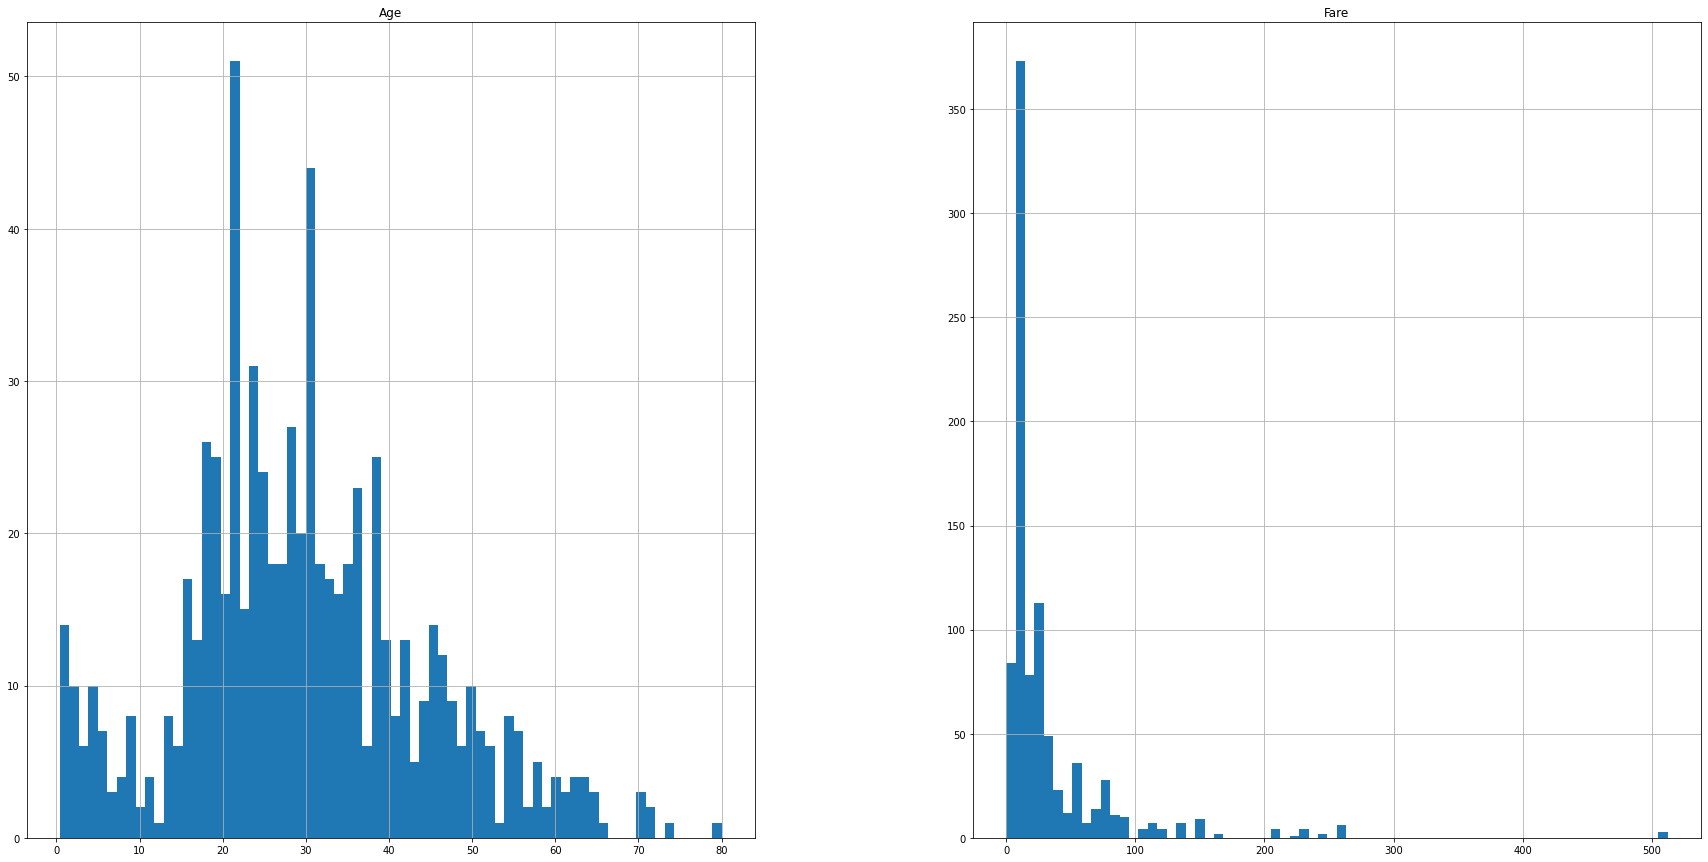

           Age      Fare
Age   1.000000  0.096067
Fare  0.096067  1.000000


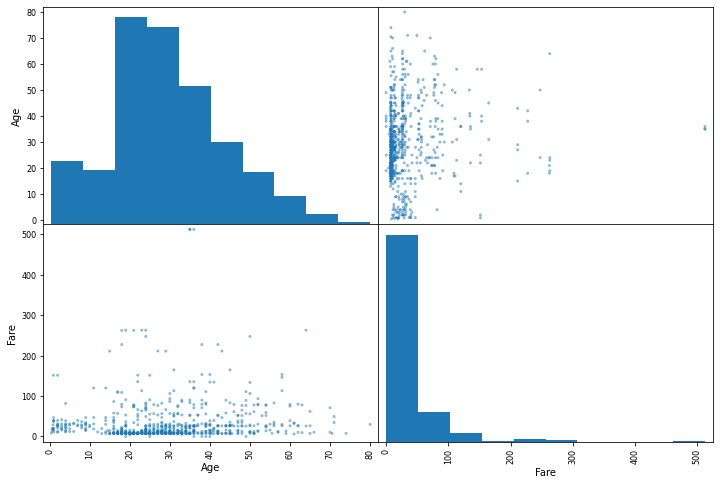

In [171]:
def histogram(df):
    df.hist(bins=70, figsize=(30,15))
    plt.show()
def plot_cor(df): 
    corr_matrix = df.corr()
    print(corr_matrix)
    attributes = df.columns
    scatter_matrix(df[attributes], figsize=(12, 8))

histogram(train3)
plot_cor(train3)

In [172]:
# Handle Nan
train3['Embarked'].fillna(train3['Embarked'].mode()[0],inplace=True)
train3['Age'].fillna(train3['Age'].mean(),inplace=True)

## **<center>Scatter Plots of Dependent vs Independent Variables**

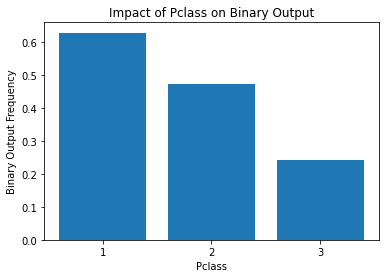

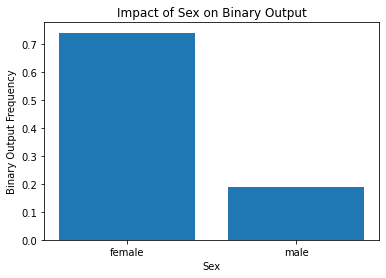

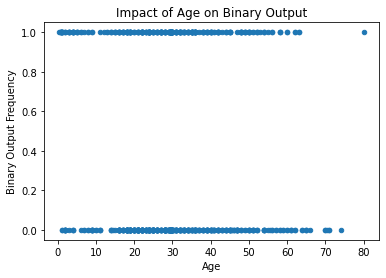

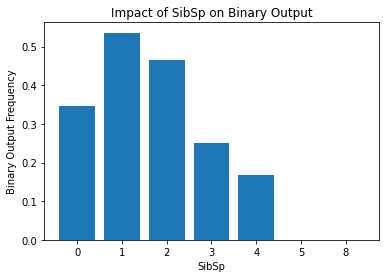

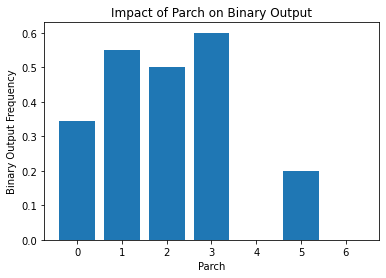

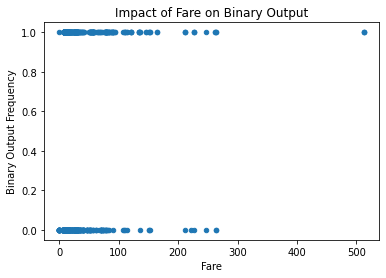

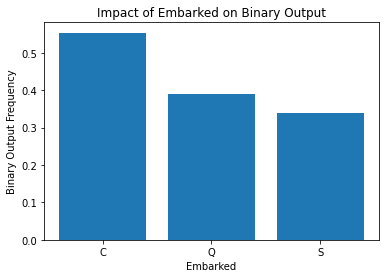

In [173]:
def plot_scatter(df,y):
    numeric_cols = df.describe().columns
    catergircal_cols = [col for col in df.columns if col not in numeric_cols]
    for x in df.drop(y,axis=1).columns:
        if x in numeric_cols:
            df.plot(kind="scatter", x=x, y=y)
        else:
            df[y] = df[y].astype(int)
            grouped = df.groupby(x)[y].mean()
            plt.bar(grouped.index, grouped)
        plt.xlabel(f'{x}')
        plt.ylabel('Binary Output Frequency')
        plt.title(f'Impact of {x} on Binary Output')
        plt.show()
    return
display(Markdown("## **<center>Scatter Plots of Dependent vs Independent Variables**"))
plot_scatter(train3,'Survived')

#### so here we can easily see that woman had more chance to survive(70%) and men had only(20%) chance to survive.

Logistic regression only accepts numerical input data, so categorical features need to be transformed into numerical features before using them as input to logistic regression. There are a few ways to handle categorical features in logistic regression:

1. **One-hot encoding:** This is a common method to handle categorical features. It involves creating a binary variable for each category in the categorical feature. For example, if a categorical feature has three categories A, B, and C, one-hot encoding would create three binary variables: Is_A, Is_B, and Is_C. Each variable would have a value of 0 or 1 to indicate whether the category is present or not. Then these binary variables can be used as input to logistic regression.

2. **Label encoding:** This method involves assigning a unique numerical value to each category in the categorical feature. For example, if a categorical feature has three categories A, B, and C, label encoding would assign the values 1, 2, and 3, respectively. However, label encoding has some limitations, as the numerical values assigned to the categories are arbitrary and may not necessarily have any inherent meaning or order.

3. **Target encoding:** This method involves replacing each category in the categorical feature with the mean of the binary output for that category. For example, if a categorical feature has three categories A, B, and C, target encoding would replace each category with the mean of the binary output for that category. This method can be useful when there is a high correlation between the categorical feature and the binary output, but it can also lead to overfitting if not done carefully.

In general, one-hot encoding is the most common and recommended method for handling categorical features in logistic regression. You can use libraries like pandas or scikit-learn to perform these transformations.

In [174]:
def one_hot_encode(df, output):
    """
    One-hot encodes categorical columns in a Pandas DataFrame.
    
    :param df: Pandas DataFrame
    :param columns: List of categorical column names to be encoded
    :return: DataFrame with encoded columns
    """
    # Make a copy of the original dataframe
    df_encoded = df.copy()
    columns = [col for col in df.columns if col not in (list(df.describe().columns)+[output])]
    
    # Iterate over each categorical column
    for col in columns:
        # Create one-hot encoding for the column and append it to the original dataframe
        one_hot = pd.get_dummies(df_encoded[col], prefix=col)
        df_encoded = pd.concat([df_encoded, one_hot], axis=1)
        
        # Drop the original categorical column from the dataframe
        df_encoded.drop(col, axis=1, inplace=True)
    
    return df_encoded

train4 = one_hot_encode(train3, 'Survived')
train4

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.000000,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.000000,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.000000,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.000000,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
887,1,19.000000,30.0000,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
888,0,29.699118,23.4500,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
889,1,26.000000,30.0000,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0


#### make integer features standard

In [175]:
for col in ['Age','Fare']:
    train4[col] = train4[col].apply(lambda x:(x-np.mean(train4[col]))/(train4[col].var()**(0.5)))
train4

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,-0.592148,-0.502163,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,0.638430,0.786404,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,-0.284503,-0.488580,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0.407697,0.420494,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,0.407697,-0.486064,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.207592,-0.386454,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
887,1,-0.822881,-0.044356,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
888,0,0.000000,-0.176164,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
889,1,-0.284503,-0.044356,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0


#### A function that do all the things above

In [176]:
def clean_input(df):
    t = change_categorical_int(df).drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
    t['Embarked'].fillna(t['Embarked'].mode()[0],inplace=True)
    t['Age'].fillna(t['Age'].mean(),inplace=True)
    t = one_hot_encode(t, 'Survived')
    for col in ['Age','Fare']:
        t[col] = t[col].apply(lambda x:(x-np.mean(t[col]))/(t[col].var()**(0.5)))
    t['Survived'] = t['Survived'].astype(int)
    return t
clean_train = clean_input(train)
clean_train

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,-0.592148,-0.502163,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,0.638430,0.786404,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,-0.284503,-0.488580,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0.407697,0.420494,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,0.407697,-0.486064,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.207592,-0.386454,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
887,1,-0.822881,-0.044356,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
888,0,0.000000,-0.176164,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
889,1,-0.284503,-0.044356,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0


In [177]:
test['Survived'] = 0
clean_test = clean_input(test).drop('Survived',axis=1)
clean_test

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
0,0.334592,-0.497213,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.323944,-0.512045,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,2.511166,-0.463974,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.259019,-0.482308,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.654760,-0.417469,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.000000,-0.493264,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
414,0.690758,1.310606,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
415,0.651184,-0.507573,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
416,0.000000,-0.493264,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### Cost function for regularized logistic regression
For regularized **logistic** regression, the cost function is of the form
$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = sigmoid(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) $$ 

Including this term encourages gradient descent to minimize the size of the parameters. Note, in this example, the parameter $b$ is not regularized. This is standard practice.(From Andrew NJ course)

In [179]:
def compute_cost_logistic_reg(X, y, w, b, lambda_ = 1):
    sigmoid = lambda z: 1 / (1 + np.exp(-z))
    m,n  = X.shape
    cost = 0.
    f_wb_i = sigmoid(np.dot(X, w) + b)   
    cost = sum(-y*np.log(f_wb_i) - (1-y)*np.log(1-f_wb_i))
    cost = cost/m                                                    

    reg_cost = sum(w**2)                                    
    reg_cost = (lambda_/(2*m)) * reg_cost                           
    
    total_cost = cost + reg_cost                                     
    return total_cost                                             

<a name="3.5"></a>
### 3.5 Gradient for regularized logistic regression

The gradient of the regularized cost function has two components. The first, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ is a scalar, the other is a vector with the same shape as the parameters $\mathbf{w}$, where the $j^\mathrm{th}$ element is defined as follows:

$$\frac{\partial J(\mathbf{w},b)}{\partial b} = \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})  $$

$$\frac{\partial J(\mathbf{w},b)}{\partial w_j} = \left( \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)} \right) + \frac{\lambda}{m} w_j  \quad\, \mbox{for $j=0...(n-1)$}$$




In [180]:
def compute_gradient_logistic_reg(X, y, w, b, lambda_): 
    m,n = X.shape
    dj_dw = np.zeros((n,))         
    dj_db = 0.0
    sigmoid = lambda z: 1 / (1 + np.exp(-z))

    f_wb_i = sigmoid(np.dot(X,w) + b)   
    err_i  = f_wb_i  - y                   
    dj_dw = np.dot(err_i,X)

    dj_db = sum(err_i)
    
    dj_dw = dj_dw/m                              
    dj_db = dj_db/m                                 

    dj_dw = dj_dw + (lambda_/m) * w

    return dj_db, dj_dw 

In [191]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)
        # Print cost every at intervals 10 times or as many iterations if < 10
        #if i% 1000 == 0 or i == (num_iters-1):
        #    print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history #return w and J,w history for graphing

In [184]:
X_train = clean_train.drop('Survived',axis=1)
y_train = clean_train['Survived']
initial_w = np.zeros(X_train.shape[1])
initial_b = 1.
lambda_ = 0.01;        
iterations = 5000
alpha = 0.01
w,b, J_history = gradient_descent(X_train.to_numpy(), y_train.to_numpy(), initial_w, initial_b, 
                                    compute_cost_logistic_reg, compute_gradient_logistic_reg, 
                                    alpha, iterations, lambda_)

Iteration    0: Cost     0.92   
Iteration 1000: Cost     0.48   
Iteration 2000: Cost     0.46   
Iteration 3000: Cost     0.45   
Iteration 4000: Cost     0.45   
Iteration 4999: Cost     0.44   


In [185]:
np.round(w,2)

array([-0.37,  0.15,  0.62,  0.08, -1.08,  1.02, -1.4 ,  0.11,  0.2 ,
       -0.02, -0.25, -0.2 , -0.08, -0.13, -0.06,  0.09, -0.23,  0.01,
       -0.09, -0.07, -0.03,  0.08, -0.01, -0.46])

In [186]:
def predict(X, w, b): 
    m, n = X.shape   
    p = np.zeros(m)
    sigmoid = lambda z: 1 / (1 + np.exp(-z))
    for i in range(m): 
        z_wb = 0
        for j in range(n): 
            z_wb_ij = X[i, j] * w[j]
            z_wb += z_wb_ij
        z_wb += b
        f_wb = sigmoid(z_wb)
        p[i] = f_wb >= 0.5
    return p

In [187]:
p = predict(X_train.to_numpy(), w, b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 80.359147


#### Now let's find best parameters with 5 fold cross-validation

In [188]:
def five_fold_cv(X,y,lambda_ = 0.01,iterations = 2000,alpha = 0.01):
    df = pd.concat([X,y],axis=1)
    df = df.sample(frac=1)
    n=len(df)//5
    folds = [df.iloc[n*i:n*(i+1)].copy() for i in range(0,5)]
    accuracy_train,accuracy_valid = [],[]
    for i in range(5):
        valid_fold = folds[i]
        train_fold = pd.concat(folds[0:i] + folds[i+1:],axis=0)
        
        X_train,y_train = train_fold.drop(y.name,axis=1), train_fold[y.name]
        X_valid,y_valid = valid_fold.drop(y.name,axis=1), valid_fold[y.name]
        initial_w = np.zeros(X_train.shape[1])
        initial_b = 1.
        w,b, J_history = gradient_descent(X_train.to_numpy(), y_train.to_numpy(), initial_w, initial_b, 
                                            compute_cost_logistic_reg, compute_gradient_logistic_reg, 
                                            alpha, iterations, lambda_)
        predict_train = predict(X_train.to_numpy(), w, b)
        predict_valid = predict(X_valid.to_numpy(), w, b)
        accuracy_train.append(np.mean(predict_train == y_train) * 100) #Train Accuracy
        accuracy_valid.append(np.mean(predict_valid == y_valid) * 100) #valid Accuracy
    return accuracy_train,accuracy_valid

In [189]:
def run_10_times(X,y,lambda_ = 0.01,iterations = 2000,alpha = 0.01):
    accuracy_train,accuracy_valid = [],[]
    for i in range(10):
        a,b = five_fold_cv(X,y,lambda_,iterations,alpha)
        accuracy_train.append(a)
        accuracy_valid.append(b)
    return accuracy_train,accuracy_valid

In [194]:
X = clean_train.drop('Survived',axis=1)
y = clean_train['Survived']
bias_var = dict()
for alpha in [0.001,0.01,0.02,0.1,0.5,1]:
    for landa in [0,0.001,0.01,0.05,0.5,1,10,100]:
        accuracy_train,accuracy_valid = run_10_times(X,y,lambda_ = landa, iterations = 2000,alpha = alpha)
        bias = round(100-np.mean(accuracy_valid),2)
        var = round(np.std(accuracy_valid),2)
        bias_var[(alpha,landa)] = {'bias':bias,'var':var}
        print(f'alpha:{alpha},lambda:{landa} -> acc_train:{np.round(np.mean(accuracy_train))}%,acc_valid:{np.round(np.mean(accuracy_valid))}% -> bias:{bias},var:{var},sum:{bias+var}')

alpha:0.001,lambda:0 -> acc_train:74.0%,acc_valid:74.0% -> bias:25.84,var:3.21,sum:29.05
alpha:0.001,lambda:0.001 -> acc_train:75.0%,acc_valid:74.0% -> bias:25.65,var:3.12,sum:28.77
alpha:0.001,lambda:0.01 -> acc_train:75.0%,acc_valid:74.0% -> bias:25.79,var:3.1,sum:28.89
alpha:0.001,lambda:0.05 -> acc_train:74.0%,acc_valid:74.0% -> bias:25.69,var:2.6,sum:28.290000000000003
alpha:0.001,lambda:0.5 -> acc_train:75.0%,acc_valid:74.0% -> bias:25.7,var:2.46,sum:28.16
alpha:0.001,lambda:1 -> acc_train:75.0%,acc_valid:74.0% -> bias:25.75,var:2.91,sum:28.66
alpha:0.001,lambda:10 -> acc_train:75.0%,acc_valid:74.0% -> bias:25.79,var:3.13,sum:28.919999999999998
alpha:0.001,lambda:100 -> acc_train:75.0%,acc_valid:75.0% -> bias:25.33,var:3.02,sum:28.349999999999998
alpha:0.01,lambda:0 -> acc_train:79.0%,acc_valid:79.0% -> bias:21.3,var:2.94,sum:24.240000000000002
alpha:0.01,lambda:0.001 -> acc_train:79.0%,acc_valid:79.0% -> bias:21.09,var:2.58,sum:23.67
alpha:0.01,lambda:0.01 -> acc_train:79.0%,acc

Bias and variance are two important concepts that are used to measure the performance and generalization ability of a model.

Bias is the error that occurs when a model makes assumptions about the training data that are too simple or not complex enough to accurately capture the underlying patterns in the data. A high bias model is one that is too simple and may underfit the data, resulting in poor training accuracy and poor generalization to new, unseen data.

Variance, on the other hand, is the error that occurs when a model is too complex and overfits the training data. In this case, the model may be too sensitive to the noise in the training data and may not generalize well to new, unseen data. A high variance model may have very good training accuracy, but poor generalization accuracy.

The goal of machine learning is to find a model with an optimal trade-off between bias and variance, which is known as the bias-variance trade-off. In practice, this involves finding a model that is complex enough to capture the underlying patterns in the data, but not so complex that it overfits the data.

In this experiment when our learning rate(alpha) as low and we don't have high iteration, model gets underfit. 

In [127]:
predict(clean_test.drop('Parch_9',axis=1).to_numpy(), w, b)

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.